In [245]:
import scanpy as sc
import pandas as pd 
import numpy as np

In [264]:
# name='control_1'
name = 'ccl4_ko_1'

# raw_dir = '/ix3/djishnu/alw399/visiumHD_lymph/control'
raw_dir = '/ix3/djishnu/alw399/visiumHD_lymph/ccl4_ko'

adata = sc.read_h5ad(raw_dir + '/adata_1.h5ad')
adata.var_names_make_unique()

/ix3/djishnu/alw399/envs/sheep/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [265]:
rctd_results = f'RCTD_Plots/{name}'

proportions = pd.read_csv(rctd_results+ '/cell_type_proportions.csv')
proportions

,B,CD8+ T,DC,NK,Resting T,Tfh,Th2,Treg,gd T
0,0.770203,0.000080,0.002466,0.101300,0.000080,0.125633,0.000080,0.000080,0.000080
1,0.318354,0.000117,0.133818,0.085615,0.321048,0.026237,0.000117,0.000117,0.114576
2,0.427750,0.000238,0.135484,0.000238,0.000238,0.229139,0.206437,0.000238,0.000238
3,0.758617,0.000120,0.076314,0.000120,0.000120,0.000120,0.164352,0.000120,0.000120
4,0.182638,0.087616,0.165851,0.000185,0.054658,0.000185,0.000185,0.508496,0.000185
...,...,...,...,...,...,...,...,...,...
63168,0.000074,0.315418,0.277713,0.000074,0.406345,0.000074,0.000074,0.000078,0.000150
63169,0.810900,0.000051,0.000051,0.000051,0.091942,0.000051,0.096853,0.000051,0.000051
63170,0.087154,0.345335,0.184121,0.000179,0.000187,0.000179,0.000179,0.154396,0.228269
63171,0.236781,0.000282,0.074532,0.017675,0.178700,0.000282,0.068136,0.400733,0.022881


In [266]:
annotations = pd.read_csv(rctd_results+'/results.csv', index_col=0)
annotations

,spot_class,first_type,second_type,first_class,second_class,min_score,singlet_score,conv_all,conv_doublet
ID_1000,singlet,B,NK,False,False,108.762952,115.873662,True,True
ID_10000,reject,B,gd T,False,False,274.636991,314.636991,True,True
ID_10001,doublet_uncertain,B,Th2,False,False,207.364520,243.277957,True,True
ID_10002,singlet,B,Th2,False,False,91.641910,97.330382,True,True
ID_10003,doublet_certain,DC,Treg,False,False,345.252226,412.383163,True,True
...,...,...,...,...,...,...,...,...,...
ID_9995,doublet_uncertain,DC,CD8+ T,False,False,211.264510,241.284118,True,True
ID_9996,singlet,B,Th2,False,False,109.527636,114.313427,True,True
ID_9997,doublet_uncertain,DC,CD8+ T,False,False,211.353436,238.801555,True,True
ID_9998,doublet_uncertain,Treg,B,False,False,351.912592,399.568595,True,True


In [267]:
annotations['spot_class'].value_counts()

spot_class
singlet              36050
reject               14702
doublet_uncertain     9173
doublet_certain       3248
Name: count, dtype: int64

In [268]:
# annotations = annotations[annotations['spot_class'] == 'singlet']
annotations = annotations[annotations['spot_class'] != 'reject']
annotations

,spot_class,first_type,second_type,first_class,second_class,min_score,singlet_score,conv_all,conv_doublet
ID_1000,singlet,B,NK,False,False,108.762952,115.873662,True,True
ID_10001,doublet_uncertain,B,Th2,False,False,207.364520,243.277957,True,True
ID_10002,singlet,B,Th2,False,False,91.641910,97.330382,True,True
ID_10003,doublet_certain,DC,Treg,False,False,345.252226,412.383163,True,True
ID_10004,singlet,B,Treg,False,False,42.921104,46.067857,True,True
...,...,...,...,...,...,...,...,...,...
ID_9995,doublet_uncertain,DC,CD8+ T,False,False,211.264510,241.284118,True,True
ID_9996,singlet,B,Th2,False,False,109.527636,114.313427,True,True
ID_9997,doublet_uncertain,DC,CD8+ T,False,False,211.353436,238.801555,True,True
ID_9998,doublet_uncertain,Treg,B,False,False,351.912592,399.568595,True,True


In [269]:
adata = adata[annotations.index, :]
adata.obs['cell_type'] = annotations['first_type'].reindex(adata.obs.index, axis=0).copy()
adata.obs['cell_type'].value_counts()

/tmp/ipykernel_31690/3543914127.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['cell_type'] = annotations['first_type'].reindex(adata.obs.index, axis=0).copy()


cell_type
B            23188
DC           20269
Resting T     1691
Treg          1340
CD8+ T        1060
gd T           378
Th2            250
Tfh            183
NK             112
Name: count, dtype: int64

In [270]:
colors = ["#50bd86",
"#c354bd",
"#766ed2",
"#beac3c",
"#d14f77",
"#608633",
"#6ebb41",
"#d14c36",
"#c77e38"]
color_dict = {ct: color for ct, color in zip(sorted(adata.obs['cell_type'].unique()), colors)}
color_dict

{'B': '#50bd86',
 'CD8+ T': '#c354bd',
 'DC': '#766ed2',
 'NK': '#beac3c',
 'Resting T': '#d14f77',
 'Tfh': '#608633',
 'Th2': '#6ebb41',
 'Treg': '#d14c36',
 'gd T': '#c77e38'}

/tmp/ipykernel_31690/2379959599.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cell_types_order, y=counts, ax=axs[1], palette=color_dict)


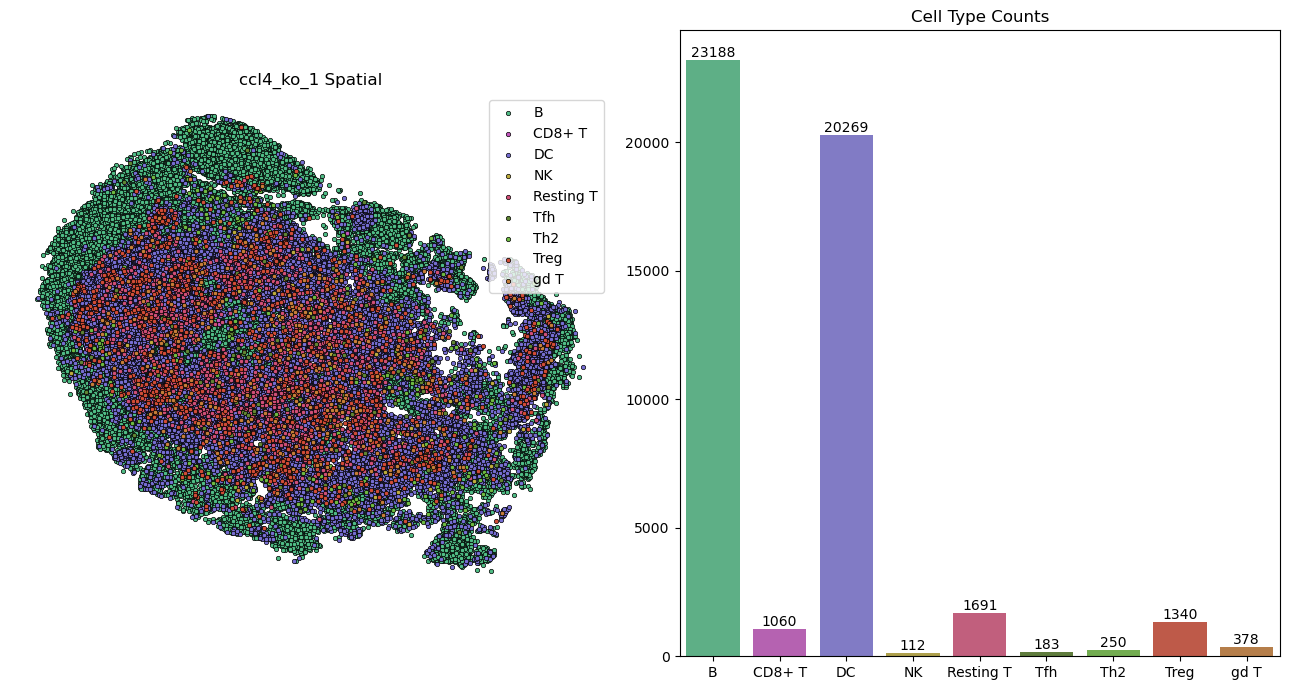

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define consistent order of cell types
cell_types_order = sorted(adata.obs['cell_type'].unique())  # or use a custom list if needed

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(13, 7))

# Spatial plot
for ct in cell_types_order:
    mask = adata.obs['cell_type'] == ct
    axs[0].scatter(
        adata.obsm['spatial'][mask][:, 0],
        adata.obsm['spatial'][mask][:, 1],
        label=ct, linewidth=0.5, edgecolor='black', s=10,
        color=color_dict.get(ct, 'gray')
    )
axs[0].set_title(f'{name} Spatial')
axs[0].set_aspect('equal')
axs[0].set_axis_off()
axs[0].legend()

# Bar plot (count of each cell_type) with the same order
cell_type_counts = adata.obs['cell_type'].value_counts()
counts = [cell_type_counts.get(ct, 0) for ct in cell_types_order]  # Ensure correct order
sns.barplot(x=cell_types_order, y=counts, ax=axs[1], palette=color_dict)
axs[1].set_title('Cell Type Counts')

# Add counts as text above bars
for i, ct in enumerate(cell_types_order):
    count = cell_type_counts.get(ct, 0)
    axs[1].text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


In [272]:
adata

AnnData object with n_obs × n_vars = 48471 × 19059
    obs: 'id', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'

In [273]:
adata.var["mt"] = adata.var_names.str.startswith("mt-")
adata.var["ribo"] = adata.var_names.str.startswith(("Rps", "Rpl"))

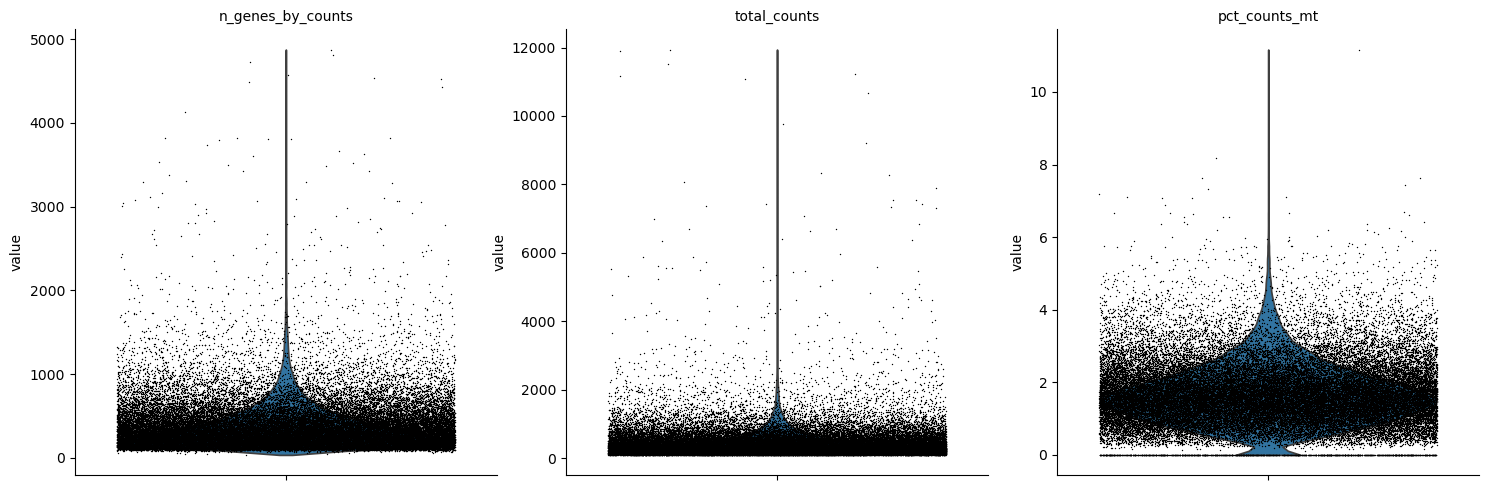

In [274]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo"], inplace=True, log1p=True
)
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [275]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)


In [276]:
adata = adata[adata.obs.n_genes < 1300, :]
adata = adata[adata.obs.pct_counts_mt < 15, :]
adata

View of AnnData object with n_obs × n_vars = 47001 × 18860
    obs: 'id', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    obsm: 'spatial'

In [277]:
adata.layers['raw_count'] = adata.X.copy()

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

adata.layers['normalized_count'] = adata.X.copy()

/tmp/ipykernel_31690/170495573.py:1: ImplicitModificationWarning: Setting element `.layers['raw_count']` of view, initializing view as actual.
  adata.layers['raw_count'] = adata.X.copy()


/ix3/djishnu/alw399/envs/sheep/lib/python3.9/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 18860 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


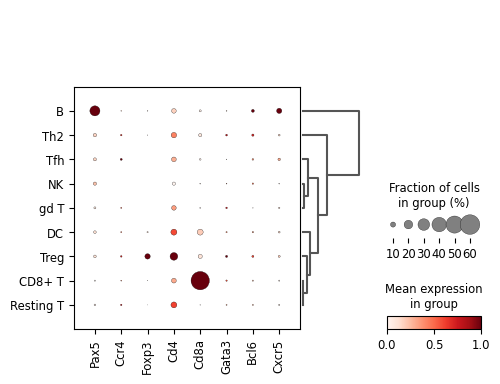

In [278]:
gois = ['Pax5', 'Ccr4', 'Foxp3', 'Cd4', 'Cd8a', 'Gata3', 'Bcl6', 'Cxcr5']

sc.pl.dotplot(
    adata, 
    gois, 
    groupby='cell_type', 
    dendrogram=True,
    use_raw=False,
    standard_scale='var',
    layer='normalized_count'
)

In [238]:
adata.write_h5ad(f'/ix3/djishnu/alw399/visiumHD_lymph/rctd_outputs/{name}.h5ad')

In [279]:
gex_df = adata.to_df(layer='raw_count')

Text(0.5, 1.0, 'ccl4_ko_1 Ki67+ Ccr4+ Gata3+ cells')

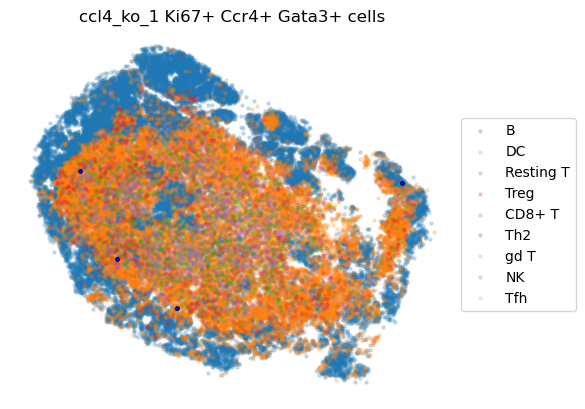

In [280]:
cells = gex_df[((gex_df['Mki67'] > 0) & (gex_df['Gata3'] > 0) & (gex_df['Ccr4'] > 0))].index

for ct in adata.obs['cell_type'].unique():
    plt.scatter(
        adata.obsm['spatial'][adata.obs['cell_type'] == ct, 0],
        adata.obsm['spatial'][adata.obs['cell_type'] == ct, 1],
        s=5, alpha=0.2,
        label=ct
    )

plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.scatter(
    adata.obsm['spatial'][adata.obs.index.isin(cells), 0],
    adata.obsm['spatial'][adata.obs.index.isin(cells), 1],
    s=8, c='blue', alpha=1, edgecolors='black', linewidths=0.5
)
plt.gca().set_aspect('equal')
plt.gca().set_axis_off()
plt.title(f'{name} Ki67+ Ccr4+ Gata3+ cells')

In [152]:
adata

AnnData object with n_obs × n_vars = 19567 × 18172
    obs: 'id', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p', 'pca', 'dendrogram_cell_type'
    obsm: 'spatial', 'X_pca'
    varm: 'PCs'
    layers: 'raw_count', 'normalized_count'

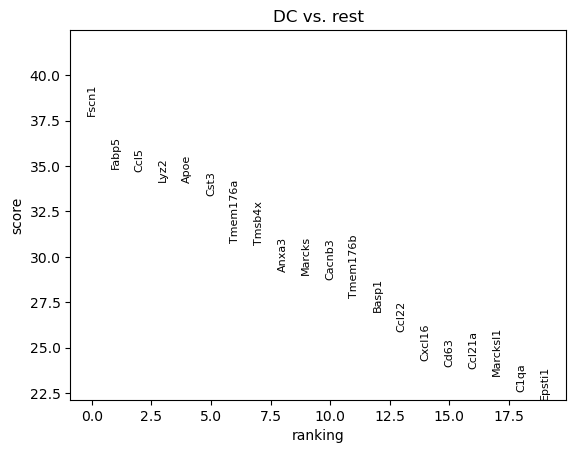

In [153]:
sc.tl.rank_genes_groups(adata, groupby='cell_type', groups=['DC'])
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [154]:
dc_subset = adata[adata.obs['cell_type'] == 'DC']
dc_subset

View of AnnData object with n_obs × n_vars = 9465 × 18172
    obs: 'id', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p', 'pca', 'dendrogram_cell_type', 'rank_genes_groups'
    obsm: 'spatial', 'X_pca'
    varm: 'PCs'
    layers: 'raw_count', 'normalized_count'

In [ ]:
sc.tl.pca(dc_subset, n_comps=30)
sc.pp.neighbors(dc_subset, use_rep='X_pca')
sc.tl.umap(dc_subset)
sc.tl.leiden(dc_subset, resolution=0.6)

dc_subset.obs['leiden'].value_counts()

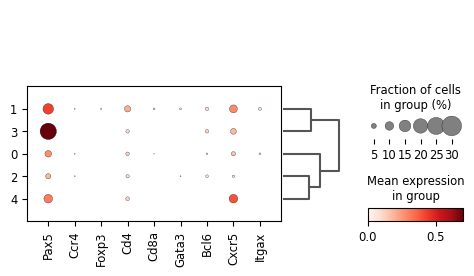

In [120]:
gois.append('Itgax')
sc.pl.dotplot(
    dc_subset, 
    gois, 
    groupby='leiden', 
    dendrogram=True,
    use_raw=False,
    # standard_scale='var',
    layer='normalized_count'
)